# iris-ml-project

Data: 2021-12-13<br>
Description: This is a Lris-ML-Project.

In [72]:
# Python version
import sys
print('Python: {}'.format(sys.version))

Python: 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]


In [73]:
#----Scientific Libraries/Packages---
# scipy library
import scipy
print('scipy: {}'.format(scipy.__version__))

scipy: 1.6.3


In [74]:
# numpy library
import numpy
print('numpy: {}'.format(numpy.__version__))

numpy: 1.19.2


In [75]:
# pandas library
import pandas
print('pandas: {}'.format(pandas.__version__))

pandas: 1.2.3


In [76]:
# matplotlib library
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.4.0


In [77]:
# scikit-learn library
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 0.24.1


In [78]:
# Load All Necessary Libraries/Modules
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [79]:
# Load Iris Dataset (here from CSV file but you can also load from the URL)
url = "./iris.csv"

In [80]:
#Assign name to each column 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [81]:
#Load Iris data with column names in an array named dataset
dataset = pandas.read_csv(url, names=names)

In [82]:
# Display Shape of dataset (Row and Column)
print(dataset.shape)

(150, 5)


In [83]:
# Display Head (first 5 Rows) of dataset
print(dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [84]:
# Display Head (Given Number of Rows) of dataset
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [85]:
# Display statistical information of Dataset : count, mean, the min and max values
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [86]:
#Display the total number of rows of each Class/Label
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


C:\Users\35199\anaconda3\envs\pytorch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\35199\anaconda3\envs\pytorch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


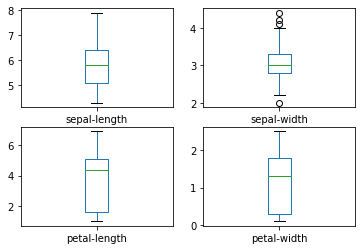

In [87]:
# Display information of Dataset using different Graphs
# 1 Box and Whisker Plots (Univariate involves the analysis of a single variable)
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# Display Graph
pyplot.show()

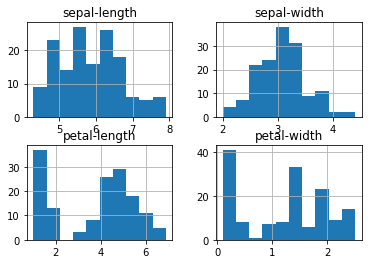

In [88]:
# Histograms Plots (This is Univariate Analysis - Examines a single variable)
dataset.hist()
# Display Graph
pyplot.show()

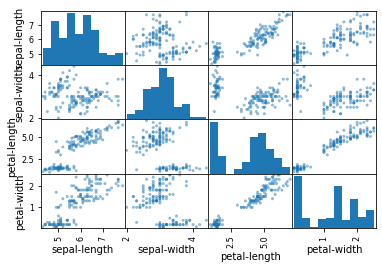

In [89]:
# Scatter Matrix Plots  (This is Multivariate Analysis - Examines two or more variables)
scatter_matrix(dataset)
# Display Graph
pyplot.show()

In [90]:
# Divide Dataset in Two (X - Data and Y - Classe/Label)
array = dataset.values

In [91]:
# Note, we stored data in "dataset" in 5 columns (see above)
# Get First Part: X - Data (i.e. first 4 columns - 0:4)
X = array[:,0:4]
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [92]:
# Get Second Part: Y - Classe/Label (i.e. last 5 column - 4)
Y = array[:,4]
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [93]:
# Divide Complete Dataset into Training Dataset (80% OR 0.80) and Testing/Validation Datasets (20% OR 0.20)
validation_size = 0.20
seed = 7 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [94]:
# Display X - Data Part of Training Dataset (80%)
print(X_train)

[[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1.0]
 [4.6 3.6 1.0 0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]
 [4.8 3.0 1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.3]
 [7.1 3.0 5.9 2.1]
 [6.7 3.3 5.7 2.1]
 [6.8 2.8 4.8 1.4]
 [6.4 2.8 5.6 2.2]
 [6.5 3.0 5.5 1.8]
 [5.7 3.0 4.2 1.2]
 [5.0 3.3 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [6.0 2.2 4.0 1.0]
 [6.4 2.7 5.3 1.9]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [4.3 3.0 1.1 0.1]
 [6.3 3.3 6.0 2.5]
 [5.5 2.4 3.7 1.0]
 [5.0 2.0 3.5 1.0]
 [6.5 2.8 4.6 1.5]
 [5.0 3.4 1.6 0.4]
 [4.4 2.9 1.4 0.2]
 [5.0 3.5 1.6 0.6]
 [6.7 3.1 4.7 1.5]
 [7.3 2.9 6.3 1.8]
 [5.5 2.6 4.4 1.2]
 [5.2 2.7 3.9 1.4]
 [5.7 4.4 1.5 0.4]
 [7.2 3.2 6.0 1.8]
 [5.4 3.4 1.7 0.2]
 [5.8 4.0 1.2 0.2]
 [6.1 2.6 5.6 1.4]
 [5.7 2.5 5.0 2.0]
 [4.8 3.0 1.4 0.1]
 [6.5 3.0 5.8 2.2]
 [4.6 3.2 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [6.7 3.0 5.2 2.3]
 [6.1 3.0 4.6 1.4]
 [5.7 3.8 1.7 0.3]
 [7.0 3.2 4.7 1.4]
 [4.7 3.2 1.3 0.2]
 [6.5 3.0 5.2 2.0]
 [7.7 2.6 6.9 2.3]
 [4.9 2.4 3.

In [95]:
# Display Y - Classe/Label Part of Training Dataset (80%)
print(Y_train)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'

In [96]:
# Display X - Data Part of Testing/Validation Dataset (20%)
print(X_validation)

[[5.9 3.0 5.1 1.8]
 [5.4 3.0 4.5 1.5]
 [5.0 3.5 1.3 0.3]
 [5.6 3.0 4.5 1.5]
 [4.9 2.5 4.5 1.7]
 [4.5 2.3 1.3 0.3]
 [6.9 3.1 4.9 1.5]
 [5.6 2.7 4.2 1.3]
 [4.8 3.4 1.6 0.2]
 [6.4 3.2 4.5 1.5]
 [6.7 3.0 5.0 1.7]
 [6.0 3.4 4.5 1.6]
 [5.2 4.1 1.5 0.1]
 [7.2 3.6 6.1 2.5]
 [5.2 3.4 1.4 0.2]
 [5.9 3.2 4.8 1.8]
 [6.7 2.5 5.8 1.8]
 [6.4 3.1 5.5 1.8]
 [5.1 3.8 1.6 0.2]
 [4.9 3.1 1.5 0.1]
 [5.8 2.7 3.9 1.2]
 [6.9 3.2 5.7 2.3]
 [6.1 2.9 4.7 1.4]
 [6.0 2.2 5.0 1.5]
 [7.2 3.0 5.8 1.6]
 [6.0 3.0 4.8 1.8]
 [6.2 2.9 4.3 1.3]
 [5.5 2.4 3.8 1.1]
 [5.8 2.7 5.1 1.9]
 [6.7 3.1 5.6 2.4]]


In [97]:
# Display Y - Classe/Label Part of Testing/Validation Dataset (20%)
print(Y_validation)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [98]:
# Train Each Algorithm on 80% Dataset 
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.053359)
KNN: 0.983333 (0.050000)
CART: 0.991667 (0.025000)
NB: 0.975000 (0.038188)
SVM: 0.991667 (0.025000)


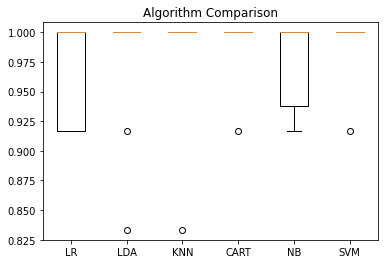

In [99]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [100]:
# Make predictions on validation dataset using KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

In [101]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [102]:
# Make predictions on validation dataset using SVC
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [103]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



Here we start.

Part1: Test the prediction accuracy of four remaining models/algorithms,

(1)First, we use LogisticRegression.

In [104]:
# Make predictions on validation dataset using LR
model =  LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [105]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

       accuracy                           0.80        30
      macro avg       0.85      0.83      0.82        30
   weighted avg       0.83      0.80      0.80        30



it seems accuracy for LogisticRegression is 80%, just so so.

(2)Then, we use LinearDiscriminantAnalysis.

In [106]:
# Make predictions on validation dataset using LDA
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [107]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Amazing, it has accuracy for 96.67%, very high

(3)Now, we use DecisionTreeClassifier.

In [108]:
# Make predictions on validation dataset using CART
model =  DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [109]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



emm, it have accuracy for 90%, no bad.

(4)Now, we use GaussianNB.

In [110]:
# Make predictions on validation dataset using NB
model =  GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [111]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



it has accuray for 83.33%, a little bad.

OK, it seems Task1 are finished.

Now, start our Task2.

Task2: Add 4 or more Classification Algorithms, and check their training and testing results. 

Let's find out what modle we have in sklearn.

In [112]:
dir(sklearn.linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'TweedieRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_glm',
 '_huber',
 '_least_angle',
 '_logistic',
 '_omp',
 '_pa

In [113]:
# Train Each Algorithm on 80% Dataset 
from sklearn.neural_network import MLPClassifier
from sklearn import tree
models = []
models.append(('Perceptron', sklearn.linear_model.Perceptron()))
models.append(('SGD', sklearn.linear_model.SGDClassifier()))
models.append(('PAC', sklearn.linear_model.PassiveAggressiveClassifier()))
models.append(('RCCV', sklearn.linear_model.RidgeClassifierCV()))
models.append(('BP', MLPClassifier(max_iter=10000)))
models.append(('TREE', tree.DecisionTreeClassifier()))
models.append(('NB', sklearn.naive_bayes.GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Perceptron: 0.758333 (0.198781)
SGD: 0.800000 (0.100000)
PAC: 0.866667 (0.092796)
RCCV: 0.883333 (0.092796)
BP: 0.991667 (0.025000)
TREE: 0.975000 (0.053359)
NB: 0.975000 (0.038188)


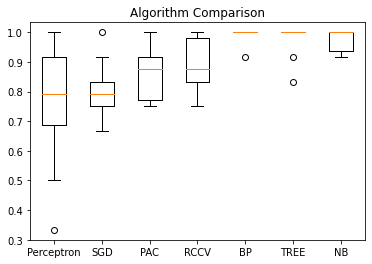

In [114]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

(1)First, we try Perceptron.

In [115]:
# Make predictions on validation dataset using Perceptron.
model =  sklearn.linear_model.Perceptron()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [116]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7666666666666667
[[ 6  1  0]
 [ 0  7  5]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.86      0.92         7
Iris-versicolor       0.78      0.58      0.67        12
 Iris-virginica       0.67      0.91      0.77        11

       accuracy                           0.77        30
      macro avg       0.81      0.78      0.79        30
   weighted avg       0.79      0.77      0.76        30



no good, it seems Perceptron only have 76.67% accuracy in this tasks.

(2)Then, we try SGDClassifier.

In [117]:
# Make predictions on validation dataset using SGD.
model =  sklearn.linear_model.SGDClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [118]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 6  1  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.86      0.92         7
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.87        30
      macro avg       0.90      0.86      0.88        30
   weighted avg       0.88      0.87      0.87        30



no bad, it seems Perceptron only have 83.34% accuracy in this tasks.

(3)Then, we try PassiveAggressiveClassifier.

In [119]:
# Make predictions on validation dataset using PAC.
model =  sklearn.linear_model.PassiveAggressiveClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [120]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7666666666666667
[[7 0 0]
 [0 7 5]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.78      0.58      0.67        12
 Iris-virginica       0.64      0.82      0.72        11

       accuracy                           0.77        30
      macro avg       0.81      0.80      0.80        30
   weighted avg       0.78      0.77      0.76        30



no good, it seems Perceptron only have 76.67% accuracy in this tasks.

(4)Then, we try RidgeClassifierCV.

In [121]:
# Make predictions on validation dataset using PAC.
model =  sklearn.linear_model.RidgeClassifierCV()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [122]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6666666666666666
[[6 1 0]
 [0 5 7]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.86      0.92         7
Iris-versicolor       0.62      0.42      0.50        12
 Iris-virginica       0.56      0.82      0.67        11

       accuracy                           0.67        30
      macro avg       0.73      0.70      0.70        30
   weighted avg       0.69      0.67      0.66        30



very bad, only66.67%. So bad.

(5) Then we use bp

In [123]:
# Make predictions on validation dataset using BP.
from sklearn.neural_network import MLPClassifier
model =  MLPClassifier(max_iter=10000)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [124]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



ohh , 93.333% very high!

(6) Then we use tree

In [125]:
# Make predictions on validation dataset using DecisionTree.
from sklearn import tree
model =  tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [126]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



86.67% good!

(7)Finally, we try GaussianNB.

In [127]:
# Make predictions on validation dataset using GaussianNB.
model =  sklearn.naive_bayes.GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [128]:
#Evaluate Predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



83.3%,  good!

That's all for tasks, Thak you!